# Initialize runtime

In [0]:
import tensorflow as tf
print('***** TENSORFLOW version', tf.__version__)

if tf.__version__ == '1.15.0':
  print('Installing latest version of TF', tf.__version__)
  !pip uninstall tensorflow -y
  !pip install tensorflow-gpu
!pip3 install sklearn
!pip3 install pandas

***** TENSORFLOW version 2.2.0-rc2


# Print runtime

In [0]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc2


# Mount Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Load data, Process data

In [0]:
import os
import numpy as np
import tensorflow as tf
import sys
# -------------- for lstm
def load_X(path):
  # try:
  the_file = None
  X_signals = []
  files = os.listdir(path)
  files.sort(key=str.lower)
  for my_file in files:
      the_file = my_file
      fileName = os.path.join(path, my_file)
      file = open(fileName, 'r')
      X_signals.append(
          [np.array(cell, dtype=np.float32) for cell in [
              row.strip().split(' ') for row in file
          ]]
      )
      file.close()
      # X_signals = 6*totalStepNum*128
  return np.transpose(np.array(X_signals), (1, 2, 0)) 
  # except:
  #   print(the_file)
  #   print(np.array(X_signals).shape)
  #   sys.exit()
    #                               0              1    2   
    # lstm input shape = (total_num_of_trials x 128 x 6)


def load_y(y_path):
    file = open(y_path, 'r')
    # Read dataset from disk, dealing with text file's syntax
    y_ = np.array(
        [elem for elem in [
            row.replace('  ', ' ').strip().split(' ') for row in file
        ]],
        dtype=np.int32
    )
    file.close()
    # Substract 1 to each output class for friendly 0-based indexing
    y_ = y_ - 1
    # one_hot
    y_ = y_.reshape(len(y_))
    n_values = int(np.max(y_)) + 1
    return np.eye(n_values)[np.array(y_, dtype=np.int32)]  # Returns FLOATS

def load_dataset(path):
    X_signals = []
    files = os.listdir(path)
    files.sort(key=str.lower)
    for my_file in files:
        fileName = os.path.join(path, my_file)
        file = open(fileName, 'r')
        X_signals.append(
            [np.array(cell, dtype=np.float32) for cell in [
                row.strip().split(' ') for row in file
            ]]
        )
        file.close()
    return np.transpose(np.array(X_signals), (1, 2, 0)) 

def load_labels(path):
    file = open(path, 'r')
    # Read dataset from disk, dealing with text file's syntax
    y_ = np.array(
        [elem for elem in [
            row.replace('  ', ' ').strip().split(' ') for row in file
        ]],
        dtype=np.int32
    )
    file.close()
    # Substract 1 to each output class for friendly 0-based indexing
    y_ = y_ - 1
    # one_hot
    y_ = y_.reshape(len(y_))
    n_values = int(np.max(y_)) + 1
    return np.eye(n_values)[np.array(y_, dtype=np.int32)]  # Returns FLOATS

### new way of loading data; this will replace the existing way
def load_data(train_split=0.8, validate_split=0.0, test_split=0.2):
  dataset = load_dataset(path + '/train')
  labels = load_labels(path + '/y_train.txt')

  n = len(dataset)

  print('Total samples: ', len(labels), '\n')

  # split data into training, validation and testing
  x_train = dataset[:int(n*train_split)]
  x_validate = dataset[-int(n*validate_split):]
  x_test = dataset[-int(n*test_split):]

  # split labels into training, validation and testing
  y_train = labels[:int(n*train_split)]
  y_validate = labels[-int(n*validate_split):]
  y_test = labels[-int(n*test_split):]

  return (x_train, y_train), (x_validate, y_validate), (x_test, y_test)

legacy = True

if legacy:
  # path = '/content/drive/My Drive/dataset/' + 'Dataset#1'
  
  # path = '/content/drive/My Drive/eecs4088/zou/dataset/Dataset#2'
  # path = '/content/drive/My Drive/eecs4088/zou/dataset/Dataset#1'
  # path = '/content/drive/My Drive/eecs4088/zou/dataset/d1_4unique_4overlap'
  # path = '/content/drive/My Drive/eecs4088/zou/dataset/d1_1unique_0overlap'
  # path = '/content/drive/My Drive/eecs4088/zou/dataset/half_unique'
  # path = '/content/drive/My Drive/Gait Identification and Analysis/datasets/human-gait-db/89-subjects-one-session-d1'

  # path = '/content/drive/My Drive/eecs4088/zou/dataset/Dataset#3'
  path = '/content/drive/My Drive/eecs4088/zou/dataset/human-gait-db/89-subjects-one-session-d1'
  X = load_X(path + '/imu')
  # X_test = load_X(path + '/test/InertialSignals')
  y = load_y(path + '/labels/train_id.txt')
  # test_label = load_y(path + '/test/y_test.txt')

  # X_train = load_X(path + '/train/InertialSignals')
  # X_test = load_X(path + '/test/InertialSignals')
  # train_label = load_y(path + '/train/y_train.txt')
  # test_label = load_y(path + '/test/y_test.txt')
  number_of_subjects = 118
else:
  path = '/content/drive/My Drive/eecs4088/zou/dataset/Dataset#1'
  number_of_subjects = 118
  (X_train, train_label), (X_validate, validate_label), (X_test, test_label) = load_data(train_split=0.8, validate_split=0.1, test_split=0.1)

print('X_train.shape : ', X_train.shape, '\n')
# print('X_validate.shape : ', X_validate.shape, '\n')
print('X_test.shape : ', X_test.shape, '\n')

X_train.shape :  (26283, 128, 6) 

X_test.shape :  (2991, 128, 6) 



split proeprly


In [0]:
from sklearn.model_selection import train_test_split
# X = np.concatenate((X_train, X_test), axis=0)
# display(X.shape)
# y = np.concatenate((train_label, test_label), axis=0)

X_train, X_test, train_label, test_label = train_test_split(X, y, test_size=0.1, random_state=42)

# Check data

In [0]:
# X_train = X_train[:-104]
# train_label = train_label[:-104]

# X_test = X_test[:-240]
# test_label = test_label[:-240]
import numpy as np
print('X_train.shape : ', X_train.shape)
print('len(train_label) : ', len(train_label))
print('X_test.shape : ', X_test.shape)
print('len(test_label) : ', len(test_label))
print(number_of_subjects)
print(np.unique(train_label).shape)

print((np.unique(test_label.squeeze().argmax(axis=1))).shape)

# todo: check data points per subject are roughly equivalent

X_train.shape :  (33691, 64, 6)
len(train_label) :  33691
X_test.shape :  (3685, 64, 6)
len(test_label) :  3685
118
(2,)
(118,)


[link text](https://)Resampling imbalanced data

In [0]:
# Technique # 1: Under-sample based on randomly picking samples with or without replacement
# Docs: https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.RandomUnderSampler.html
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='majority', random_state=None, replacement=False)

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=None, k_neighbors=5)
from imblearn.combine import SMOTEENN
sme = SMOTEENN(sampling_strategy='all', random_state=None, smote=smote, enn=None)

dataPoints = 64
import copy
arr = copy.deepcopy(X_train)
print('train_label', train_label.shape)
orig_shape = arr.shape
print('orig shape', orig_shape)

print((arr.shape[1]*arr.shape[2] ))


arr = np.reshape(arr, (arr.shape[0], (arr.shape[1]*arr.shape[2] )))
print('reshaped', arr.shape)

arr, arr_2 = smote.fit_sample(arr, train_label)

print('resampled train', arr.shape)
print('resampled train_label', arr_2.shape)

arr = np.reshape(arr, (-1,dataPoints,6))
print('undo to orig shape', arr.shape)

X_train = arr
train_label = arr_2
# X_train = arr

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


train_label (33159, 118)
orig shape (33159, 64, 6)
384
reshaped (33159, 384)
resampled train (33691, 384)
resampled train_label (33691, 118)
undo to orig shape (33691, 64, 6)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Butterworth Noise Filter

In [0]:
from scipy.signal import butter, lfilter
import numpy as np 
import numpy as np
from scipy.signal import freqz
    
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_worth_main(data):
    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 64.0
    lowcut = 6
    highcut = 16
    # Filter a noisy signal.
    y = butter_bandpass_filter(data, lowcut, highcut, fs, order=1)
    return y

# bw_X_train = np.apply_along_axis(butter_worth_main, 1, X_train)
bw_X_train = np.apply_along_axis(butter_worth_main, 1, X_train)
bw_X_test = np.apply_along_axis(butter_worth_main, 1, X_test)

# display(bw_X_test.shape)

Data Normalization

In [0]:
nm_bw_X_train = tf.keras.utils.normalize(
    bw_X_train, axis=-1, order=1
)

nm_bw_X_test = tf.keras.utils.normalize(
    bw_X_test, axis=-1, order=2
)
display(train_label.shape)
display(nm_bw_X_train.shape)

display(test_label.shape)
display(nm_bw_X_test.shape)
# display(nm_bw_X_test)

(26283, 118)

(26283, 128, 6)

(2991, 118)

(2991, 128, 6)

In [0]:
display(X_test)
display(bw_X_test)

array([[[ 3.61046e+00, -8.14986e+00, -6.75644e+00, -7.44034e-01,
          5.15876e+00, -1.11788e-01],
        [ 2.64739e+00, -1.05779e+01,  7.69736e+00,  6.32895e-01,
          1.10115e+01, -9.18875e-02],
        [ 2.08774e+00, -1.07260e+01,  7.56568e+00,  1.51943e+00,
          4.37840e+00, -9.10573e-03],
        ...,
        [-4.81713e+00, -3.04842e+01,  2.98759e+00,  1.72897e+00,
          4.84416e-01,  6.15771e-01],
        [-1.48225e+01, -4.03574e+01,  8.69394e-01,  6.70310e-01,
          4.15058e+00,  1.43103e+00],
        [-4.88986e+00, -2.58070e+01,  7.41903e-01,  7.60766e-01,
         -2.35622e-01, -1.26097e+00]],

       [[-1.36665e+01,  4.35181e-01,  2.50133e+00,  5.77164e-01,
          1.15036e-01,  4.42810e-02],
        [-1.34946e+01, -2.99402e-01,  5.32024e-01,  3.31338e-01,
          4.33805e-01, -2.04554e-02],
        [-1.24958e+01, -1.15043e+00, -8.43358e-01,  3.96333e-02,
          5.60351e-01, -4.38514e-02],
        ...,
        [-9.96326e+00, -2.30424e+00, -4.67942

array([[[ 7.23216787e-01, -1.63251103e+00, -1.35339289e+00,
         -1.49038590e-01,  1.03335914e+00, -2.23924251e-02],
        [ 1.41383651e+00, -4.11326856e+00, -1.11532369e-01,
         -5.53001237e-02,  3.46815657e+00, -4.57623268e-02],
        [ 9.88746795e-01, -4.56260652e+00,  3.54382235e+00,
          4.75169624e-01,  3.46126341e+00, -2.19166133e-02],
        ...,
        [ 1.39096436e-01, -9.51673595e+00,  1.12094998e+00,
          9.19661205e-01, -3.99443367e-02, -1.94840190e-01],
        [-3.60718591e+00, -1.35370565e+01,  1.45929989e+00,
          9.65421174e-01,  1.54999979e+00,  4.28243940e-01],
        [-4.50473833e+00, -9.89683533e+00,  6.61077410e-01,
          4.34261989e-01,  1.77330132e+00,  2.64023533e-01]],

       [[-2.73755759e+00,  8.71717717e-02,  5.01045227e-01,
          1.15612605e-01,  2.30430382e-02,  8.86999468e-03],
        [-6.04752186e+00,  4.65216499e-02,  7.18683534e-01,
          2.07611516e-01,  1.15047180e-01,  6.73877278e-03],
        [-5.51275

# reshape data

In [0]:
X_test = X_test.reshape(-1,6,128,1)
X_test.shape
# print(X_test.ndim, X_test.shape)

# X_train.take(0)
# X_train.shape
# X_train[0][0]


# X_test = np.transpose(np.array(X_test), (1, 0, 2))#(totalStepNum*6*128)
# print(X_test.ndim, X_test.shape)

# 0    1     2
# (6, 3740, 128)
# (3740, 6, 128) for each trial (for each acc/gyr_p (for each datapoint))

(1870, 6, 128, 1)

# LSTM



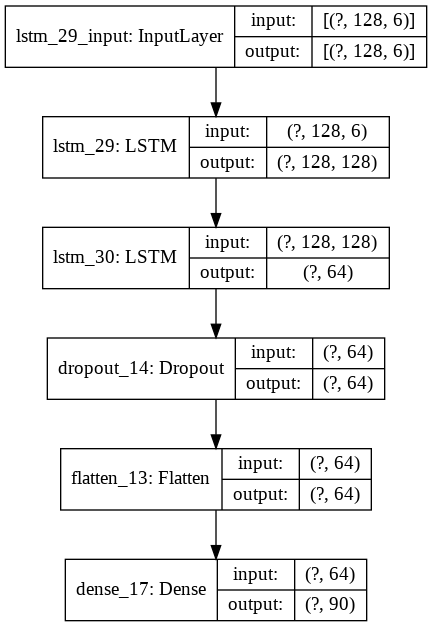

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Flatten, Dense, Dropout
from tensorflow.keras.layers import StackedRNNCells
from tensorflow.keras.layers import LSTMCell
from numpy import array

from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Bidirectional

from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense, Dropout, Activation

n_inputs = len(X_train[0][0]) #6
n_hidden = 64
n_steps = len(X_train[0]) #128
n_features = len(X_train[0][0])
learning_rate = 0.0025
t_batch_size = 1500

batch_size = 512
no_epochs = 100 # 200
verbosity = 1

lstm_model = Sequential()
classes = 90

lstm_model.add(LSTM(128,input_shape=(n_steps, n_features), return_sequences=True))
lstm_model.add(LSTM(64))


lstm_model.add(Dropout(0.50))
lstm_model.add(Flatten())
lstm_model.add(Dense(classes, activation='softmax'))


# Compile the model
lstm_model.compile(loss='categorical_crossentropy',
              optimizer='RMSProp',
              metrics=['accuracy'])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
plot_model(lstm_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Model Summary

In [0]:
# display(X_train.shape)
# lstm_model.build( X_train.shape)
lstm_model.summary()
lstm_model.get_config()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64, 128)           69120     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 118)               7670      
Total params: 126,198
Trainable params: 126,198
Non-trainable params: 0
_________________________________________________________________


{'build_input_shape': TensorShape([None, 64, 6]),
 'layers': [{'class_name': 'LSTM',
   'config': {'activation': 'tanh',
    'activity_regularizer': None,
    'batch_input_shape': (None, 64, 6),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dropout': 0.0,
    'dtype': 'float32',
    'go_backwards': False,
    'implementation': 2,
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'lstm',
    'recurrent_activation': 'sigmoid',
    'recurrent_constraint': None,
    'recurrent_dropout': 0.0,
    'recurrent_initializer': {'class_name': 'Orthogonal',
     'config': {'gain': 1.0, 'seed': None}},
    'recurrent_regularizer': None,
    'return_sequences': True,
    'return_state': False,
    'stateful': False,
    'time_major': False,
    'trainable': True,
    'unit_forget_bias': True,
    'units': 12

# Check accuracy

In [0]:
history = lstm_model.fit(X_train, train_label,
          batch_size=batch_size,
          epochs=no_epochs,
          validation_data=(X_test, test_label),
          shuffle=True,
          verbose=verbosity)

test_loss, test_acc = lstm_model.evaluate(X_test, test_label, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/100
66/66 [==============================] - 16s 239ms/step - loss: 2.3704 - accuracy: 0.3895 - val_loss: 1.1674 - val_accuracy: 0.6693
Epoch 2/100
66/66 [==============================] - 14s 218ms/step - loss: 0.7890 - accuracy: 0.7764 - val_loss: 0.6820 - val_accuracy: 0.7953
Epoch 3/100
66/66 [==============================] - 14s 219ms/step - loss: 0.3945 - accuracy: 0.8901 - val_loss: 0.2007 - val_accuracy: 0.9448
Epoch 4/100
66/66 [==============================] - 14s 220ms/step - loss: 0.2456 - accuracy: 0.9358 - val_loss: 0.2372 - val_accuracy: 0.9309
Epoch 5/100
66/66 [==============================] - 14s 218ms/step - loss: 0.1795 - accuracy: 0.9528 - val_loss: 0.1096 - val_accuracy: 0.9751
Epoch 6/100
66/66 [==============================] - 14s 218ms/step - loss: 0.1218 - accuracy: 0.9700 - val_loss: 0.1849 - val_accuracy: 0.9611
Epoch 7/100
66/66 [==============================] - 14s 219ms/step - loss: 0.1019 - accuracy: 0.9727 - val_loss: 0.0718 - val_accuracy:

In [0]:
history = lstm_model.fit(X_train, train_label,
          batch_size=batch_size,
          epochs=no_epochs,
          validation_data=(X_test, test_label),
          shuffle=True,
          verbose=verbosity)

test_loss, test_acc = lstm_model.evaluate(X_test, test_label, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/100
66/66 [==============================] - 7s 108ms/step - loss: 4.1483 - accuracy: 0.0497 - val_loss: 3.8100 - val_accuracy: 0.0798
Epoch 2/100
66/66 [==============================] - 6s 96ms/step - loss: 3.7522 - accuracy: 0.0783 - val_loss: 3.5512 - val_accuracy: 0.1018
Epoch 3/100
66/66 [==============================] - 6s 97ms/step - loss: 3.5072 - accuracy: 0.1143 - val_loss: 3.2421 - val_accuracy: 0.1699
Epoch 4/100
66/66 [==============================] - 6s 98ms/step - loss: 3.2567 - accuracy: 0.1614 - val_loss: 3.0107 - val_accuracy: 0.2272
Epoch 5/100
66/66 [==============================] - 7s 104ms/step - loss: 3.0238 - accuracy: 0.2082 - val_loss: 2.8842 - val_accuracy: 0.2401
Epoch 6/100
66/66 [==============================] - 6s 95ms/step - loss: 2.7659 - accuracy: 0.2558 - val_loss: 2.5026 - val_accuracy: 0.3743
Epoch 7/100
66/66 [==============================] - 6s 96ms/step - loss: 2.5037 - accuracy: 0.3174 - val_loss: 2.3031 - val_accuracy: 0.3684
Epoc

# Plot loss/epoch 

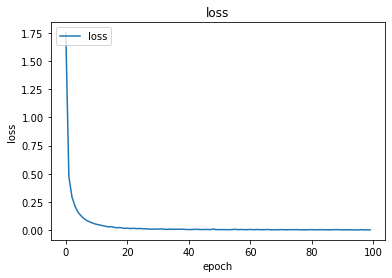

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

In [0]:
Find wrongly predicted classes

In [0]:
import sys
# import numpy
# numpy.set_printoptions(threshold=1000)

y_pred1 = lstm_model.predict(X_test)
pred_arr = np.argmax(y_pred1,axis=1)
print(pred_arr.shape)
one_hot_targets = np.eye(118)[pred_arr]
print(one_hot_targets.shape)
print(test_label.shape)
# print(pred_arr.reshape((-1,)).shape)
# print(pred_arr.reshape((-1,)))
# display(test_label.reshape((-1,)))
print(one_hot_targets)
incorrects = np.nonzero(one_hot_targets != test_label)
print(incorrects)
wrongly_pred_samples, classes = incorrects
print('no. of samples wrongly pred', len(wrongly_pred_samples))
print(sorted(set(classes)))
print(len(sorted(set(classes))))

(2928,)
(2928, 118)
(2928, 118)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
(array([  24,   24,   46,   46,   97,   97,  143,  143,  209,  209,  245,
        245,  246,  246,  367,  367,  432,  432,  459,  459,  468,  468,
        521,  521,  582,  582,  588,  588,  733,  733,  746,  746,  807,
        807,  872,  872, 1072, 1072, 1177, 1177, 1246, 1246, 1247, 1247,
       1322, 1322, 1433, 1433, 1531, 1531, 1544, 1544, 1571, 1571, 1660,
       1660, 1736, 1736, 1738, 1738, 1739, 1739, 1761, 1761, 1767, 1767,
       1890, 1890, 1926, 1926, 1965, 1965, 2071, 2071, 2156, 2156, 2266,
       2266, 2409, 2409, 2425, 2425, 2482, 2482, 2614, 2614, 2629, 2629,
       2653, 2653, 2664, 2664, 2692, 2692, 2714, 2714, 2732, 2732, 2849,
       2849]), array([ 34,  48,  79, 110,  57,  66,  44, 105,  43,  68,  43,  49,  20,
        57,  55,  90,  68,  75,  22,  84,  88, 107,  34,  48,  43, 

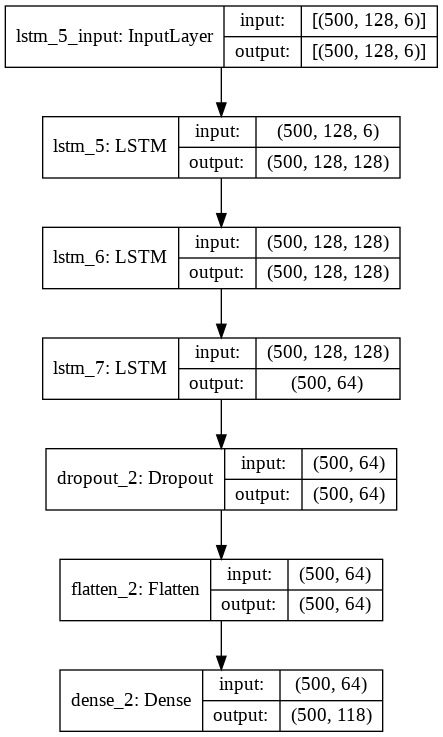

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

plot_model(lstm_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
from tensorflow.keras import backend as K
K.clear_session()